# Python for Data Science, Level I
### *Session \#10*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review

### Warm Ups

---

**Import pandas/matplotlib, set style, and create dataframe:**

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("housing_prices.csv")

**Create a linear model:** `model = LinearRegression()`

**Fit model using input** `avg_num_rooms` **to predict** `median_price`:
```python
model.fit(df[['avg_num_rooms']], df['median_price'])
```

**Predict using your linear model:** `predicted = model.predict(df[['avg_num_rooms']])`

**Find the mean_absolute_error**
```python
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['median_price'], predicted)
```

### Exercises
---

**1. Create a new** `LinearRegression` **model and fit using the** `crime_rate` **column and  the** `median_price` **column**
   

In [ ]:
model = LinearRegression()

col = ['crime_rate']

model.fit(df[col], df['median_price'])

**2. Create a variable** `predicted` **using** `model.predict()`

In [ ]:
predicted = model.predict(df[cols])

**3. What is the mean absolute error for your model?**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_squared_error(predicted, df['median_price'])

**4. Retrain your model using the** `office_percent` **column.**


In [ ]:
cols = ["office_percent"]

model.fit(df[cols], df['median_price'])

**5. Overwrite the** `predicted_price` **column using** `model.predict()`

In [ ]:
predicted = model.predict(df[cols])

**6. What is the mean absolute error for the new model?** 

In [ ]:
model.score(df[cols], df['median_price'])

## II. Multilinear Regression

### Warm Ups
---

**Training a model with multiple features:** 

```python
columns = ['avg_num_rooms', 'student_teacher_ratio', 'nitrous']
model.fit(df[columns], df['median_price'])
```

**Prediction with multiple features:** `model.predict(df[columns])`

**Compute R2 score:** `model.score(df[columns], df['median_price'])`

**Measure importance of inputs:** 
```python
model=LinearRegression(normalize=True)
model.fit(df[columns], df['median_price'])
model.coef_
```

### Exercises
---

**1. What is the R2 score for your single-variable linear model for** `median_price`?

In [ ]:
model.score(df[["office_percent"]], df['median_price'])

**2. Retrain your model using the three features you think are most important to home price**

In [ ]:
cols = ['crime_rate', 'avg_num_rooms', 'office_percent']

model.fit(df[cols], df['median_price'])

**3. What is the R2 score for your new three-variable linear model for median_price?**

In [ ]:
model.score(df[cols], df['median_price'])

**4. Create a model and set** `normalized=True`. **Retrain your model using all available column data, minus** `median_price` **of course!**

In [ ]:
model = LinearRegression(normalize=True)

model.fit(df.drop("median_price", axis="columns"), df['median_price'])

**5. Output the coefficients of the linear model using** `.coef_`. **Which feature is the most important? What factor is the most damaging for a house's price?** 

In [ ]:
answers = pd.DataFrame({"coefficients": model.coef_, "names": df.columns[:-1]})
answers.sort_values('coefficients')

## III. Linear Regression Assumptions

### Warm Ups
---

**Use a scatter plot to check for linearity and equal variance:** 
```python
df.plot.scatter(x='nitrous', y='median_price')
```

**Use a correlation matrix to check for dependence between variables:** `df.corr()`

**Create a histogram of a column** 
```python
df['error'].plot.hist(bins=50)
```

### Exercises
---

**1. Check the correlation matrix for** `housing_df` **to find features that are more than 90% correlated**

In [ ]:
stats = df.corr()
near1 = ((stats > 0.9)& (stats < 1)).any()
stats[near1]

**2. Use a scatter plot to check linearity and equal variance for** `avg_num_rooms` **and** `student_teacher_ratio`. **Which of these is a better indicator for price?** 

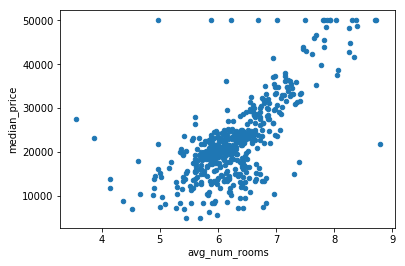

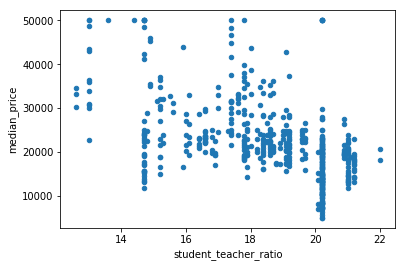

In [67]:
df.plot.scatter(x='avg_num_rooms', y='median_price')
df.plot.scatter(x='student_teacher_ratio', y='median_price')

# Average number of rooms is a better indicator based on linear pattern and consistent variance

**3. Create a variable** `error` **which is the difference between** `predicted` **and** `median_price`.

In [1]:
df['error'] = model.predict(df[df.columns[:-1]]) - df['median_price']

**4. Create a histogram of the** `error` **column. Is it normal, and centered on 0?**

In [4]:
df['error'].plot.hist(bins=50)

# Yes, error appears normally distributed